# matplotlibの基本

[公式ドキュメントのチュートリアル](https://matplotlib.org/3.5.1/tutorials/introductory/usage.html)

[めっちゃまとまってるwiki](https://qiita.com/nkay/items/d1eb91e33b9d6469ef51)

[中級者向けの注意書き](https://qiita.com/skotaro/items/08dc0b8c5704c94eafb9)

## matplotlibとは

Pythonでグラフを描画するならこれ！

## インポート

In [1]:
import numpy as np
import matplotlib.pyplot as plt # matplotlibライブラリ下にあるpyplotというモジュールをpltという名前でインポートする
import japanize_matplotlib # 日本語がつかえるようになる
# グラフをインライン表示する(GUI表示しない)
%matplotlib inline 
# グラフをnotebook上で高画質表示する
%config InlineBackend.figure_formats = {'png', 'retina'} 

## maplotlib figure の部品

In [ ]:
# matplotlib公式ページより
from IPython import display
display.Image(
  url='https://matplotlib.org/3.5.1/_images/anatomy.png',
  height=500,
  retina=True
)

## matplotlibでのグラフの描画(2通りあるので注意)

### 1. PyPlotインターフェース

全てを`plt.xxx`で済ませるやり方。figureの細かい設定などができないので、提出用の図を作るときではなく、あくまで確認用で使うと良い。

例)

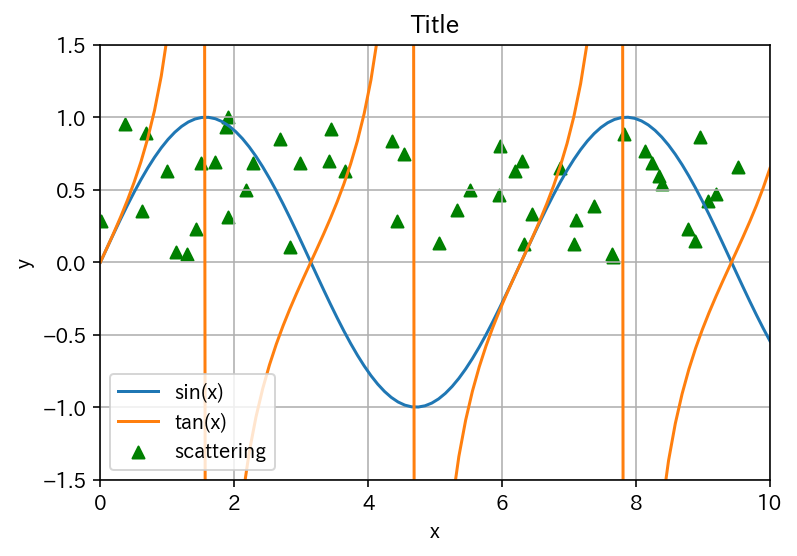

In [ ]:
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.tan(x)

plt.plot(x, y1, label='sin(x)')
plt.plot(x, y2, label='tan(x)')

points_x = np.random.rand(50)*10
points_y = np.random.rand(50)

plt.scatter(points_x, points_y, label='scattering', c='green', marker='^')


plt.xlabel('x')
plt.ylabel('y')

plt.title('Title')

plt.xlim([0,10])
plt.ylim([-1.5, 1.5])

plt.legend()
plt.grid()

plt.show()

### 2. オブジェクト指向インターフェース

figureなどを設置していくスタイル。こちらのほうが細かい調整が利く。

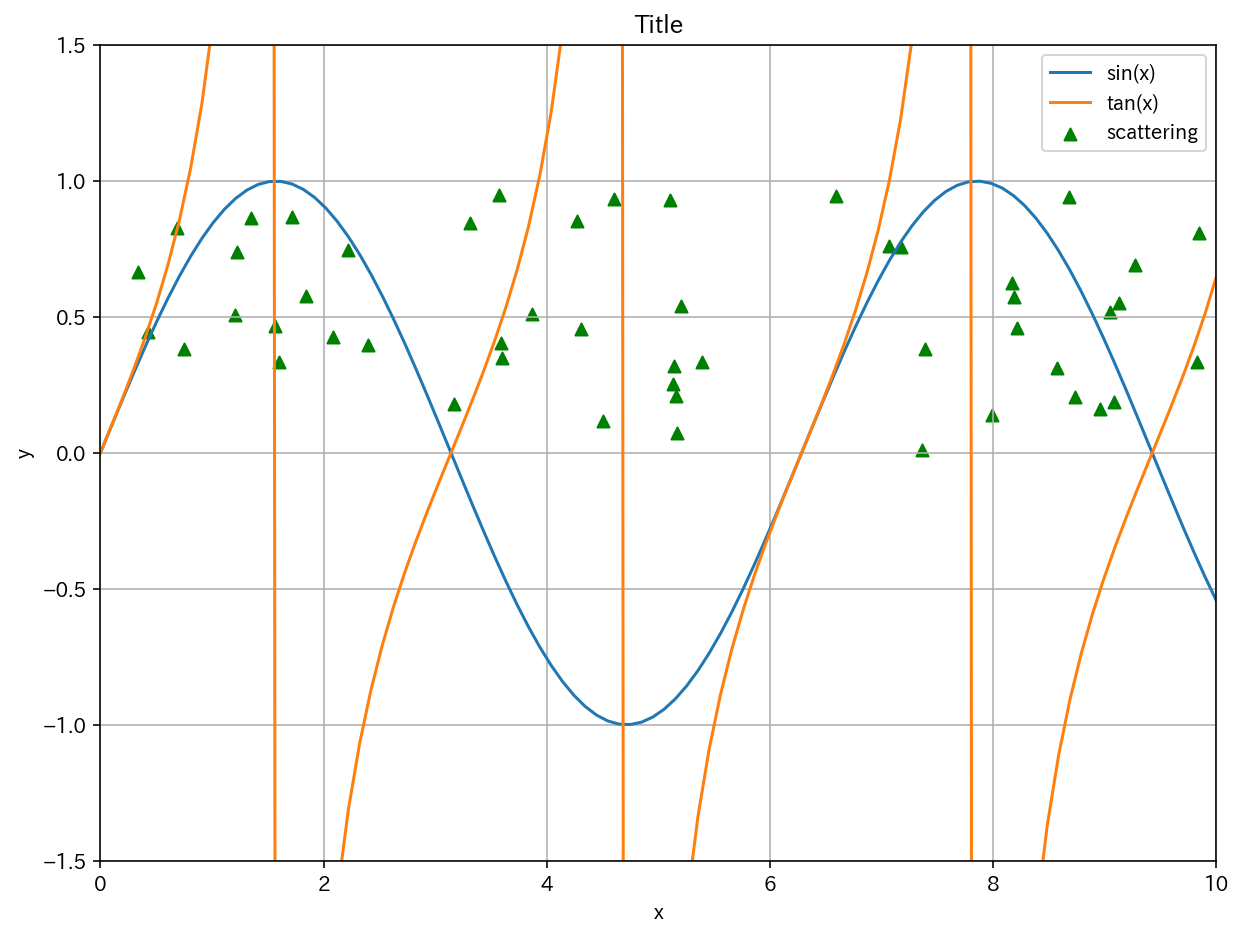

In [ ]:
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.tan(x)

figure = plt.figure(facecolor='w', figsize=(10, 7.5))
ax = plt.subplot(111)

ax.plot(x, y1, label='sin(x)')
ax.plot(x, y2, label='tan(x)')

points_x = np.random.rand(50)*10
points_y = np.random.rand(50)

ax.scatter(points_x, points_y, label='scattering', c='green', marker='^')

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_title('Title')

ax.set_xlim([0,10])
ax.set_ylim([-1.5, 1.5])

ax.legend()
ax.grid()

plt.show()

本講習では基本的に後者の「オブジェクト指向インターフェース」を用いていくことにする。

## figureとaxes(グラフ描画の準備)

*   [plt.figure](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html) : 図を書くためのキャンバス
*   [plt.axes](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axes.html) : 図を載せる土台。これが複数あると、1つのキャンバスに複数の図を載せることができる



ここらへんの話は深入りすると厄介なので、本格的にmatplotlibを使う際に調べてみて欲しい。

1つのfigureに1つの図(axes)を載せたい場合

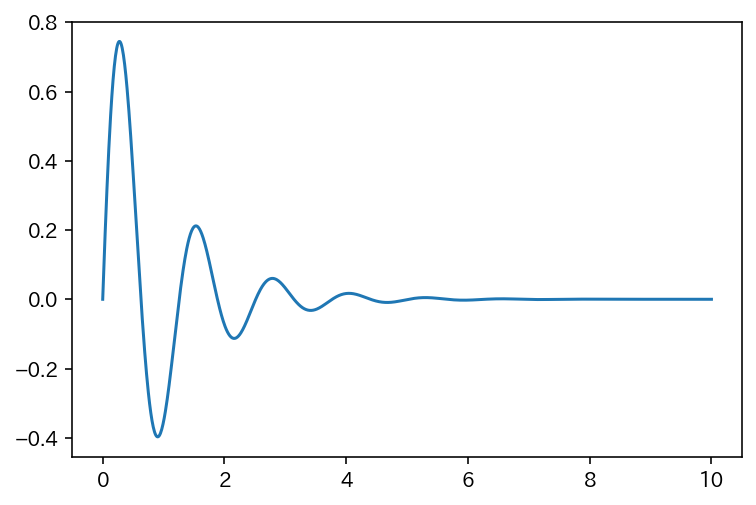

In [ ]:
fig, ax = plt.subplots(
  figsize = None, # [横、縦]をインチで指定。デフォルトは[6.4, 4.8]
  dpi = None, # dot-per-inchi、つまり解像度。デフォルトは100
  facecolor = None, # キャンバスの色を指定
  edgecolor = None, # 縁の色を指定
  # ここまではplt.figureのコンストラクタ, Noneのところは特にいじらなければ省略可能
)

x = np.linspace(0, 10, 1001)

ax.plot(x, np.exp(-x)*np.sin(5*x))

plt.show()

1つのfigureに複数の図(axes)を載せたい場合

<class 'numpy.ndarray'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


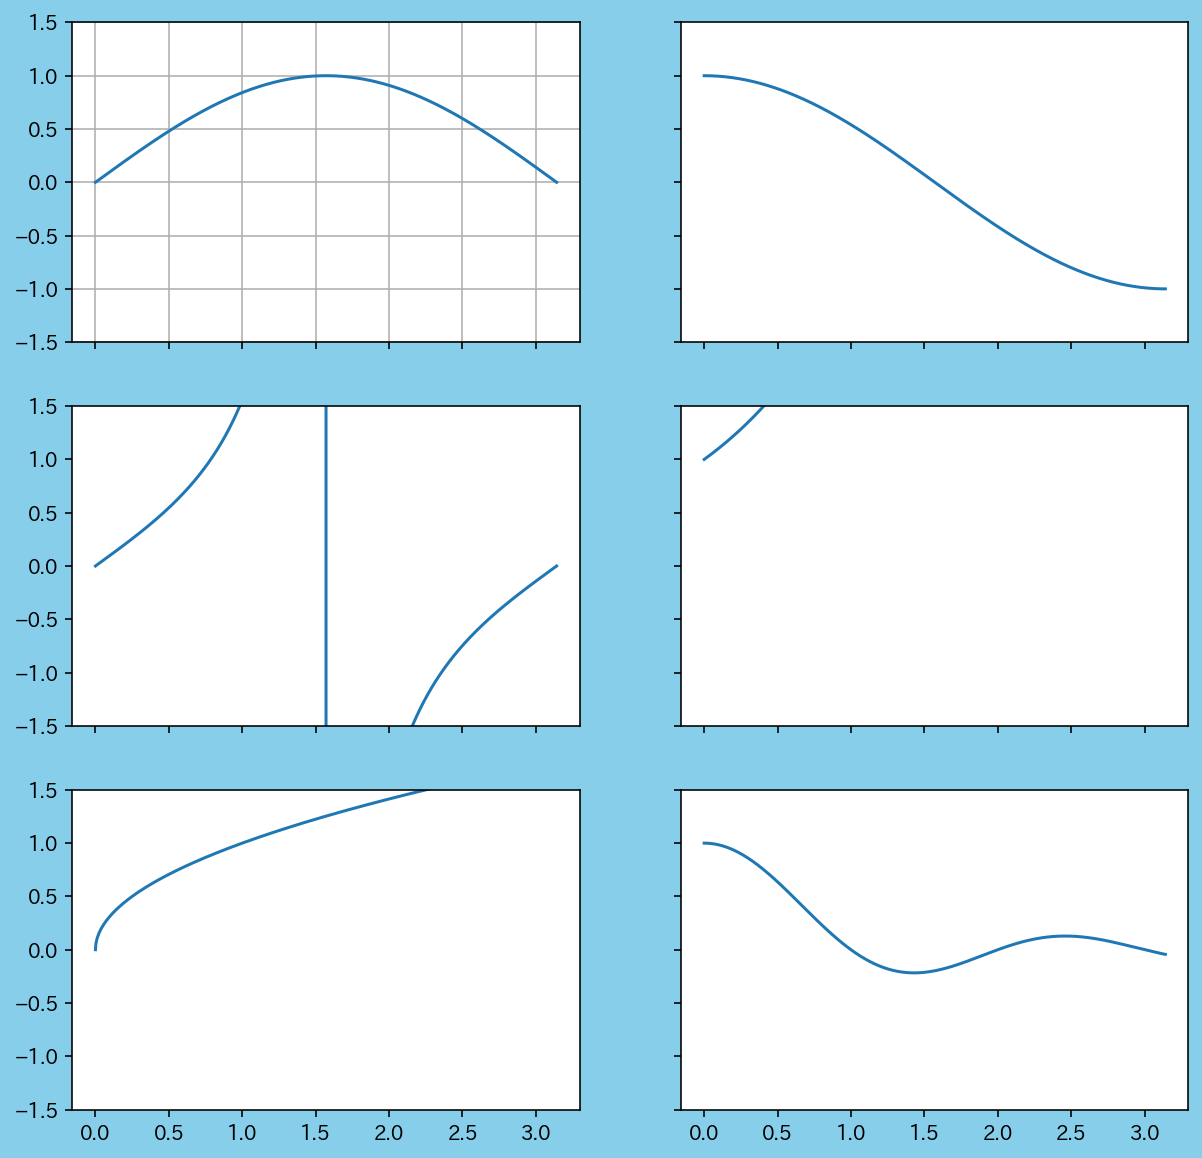

In [ ]:
fig, ax = plt.subplots(
  3, 2, # 第一引数に行数、第二引数に何列かを指定する
  sharex = True, # True/'all'ですべてのグラフでx軸を共有する。'col`とすると、同じ列(colum)のグラフでx軸を共有する
  sharey = True, # True/'all'ですべてのグラフでx軸を共有する。'row`とすると、同じ行(row)のグラフでy軸を共有する
  figsize = [10.0, 10.0], # [横、縦]をインチで指定。デフォルトは[6.4, 4.8]
  dpi = None, # dot-per-inchi、つまり解像度。デフォルトは100
  facecolor = 'skyblue', # キャンバスの色を指定
  edgecolor = 'yellow', # 縁の色を指定
  # ここまではplt.figureのコンストラクタ。Noneのところは特にいじらなければ省略可能
)

# 複数のaxesを生成した場合は、axにnumpy arrayが代入され、それぞれの要素がaxesとなる。
print(type(ax))
print(type(ax[0,0]))

x = np.linspace(0, np.pi, 1000)

# pythonのリストはオブジェクトであれば何でも要素にすることができる。そう、関数さえも。
# lambda式は「無名関数」と呼ばれ、一行で関数を定義したいときに便利。
functions = [
  lambda x : np.sin(x),
  lambda x : np.cos(x),
  lambda x : np.tan(x),
  lambda x : np.exp(x),
  lambda x : np.sqrt(x),
  lambda x : np.sinc(x),
]

n = 0
for row in range(3):
  for col in range(2):
    ax[row, col].plot(x, functions[n](x))
    n += 1

ax[0,0].set_ylim([-1.5, 1.5]) # sharey=Trueになっているので、1つ調整すると全て調整される
ax[0,0].grid() # gridは共有されていないので1つだけ反映される
plt.show()

## figureの保存

`plt.savefig("保存名")`を`plt.show()`の直前に書く

Google Colabの場合はDriveをマウントしてその中に保存する必要があるので注意

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


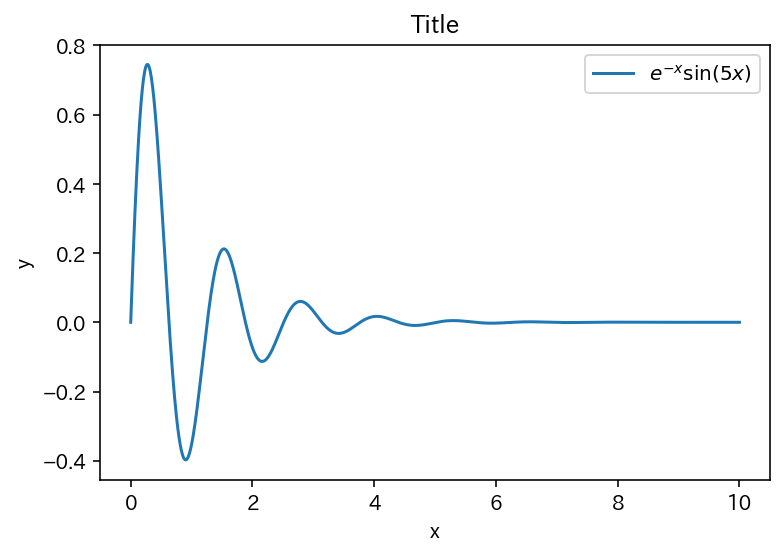

In [ ]:
fig, ax = plt.subplots(
  figsize = None, # [横、縦]をインチで指定。デフォルトは[6.4, 4.8]
  dpi = None, # dot-per-inchi、つまり解像度。デフォルトは100
  facecolor = None, # キャンバスの色を指定
  edgecolor = None, # 縁の色を指定
  # ここまではplt.figureのコンストラクタ, Noneのところは特にいじらなければ省略可能
)

x = np.linspace(0, 10, 1001)

ax.plot(x, np.exp(-x)*np.sin(5*x), label='$e^{-x}\sin(5x)$')

ax.set(
  title = 'Title',
  xlabel = 'x',
  ylabel = 'y',
)

ax.legend()

# ビットマップ形式
plt.savefig("test.png")
plt.savefig("test.jpg")

# ベクター形式
plt.savefig("test.pdf")
plt.savefig("test.svg")
plt.savefig("test.eps")



plt.show()

## `plt.plot()` (折れ線グラフ)

実験値のプロットは無闇に線でつないではいけない(戒め)。

これを使うときは数学関数とか、フィッティングをしたいときにとどめよう。

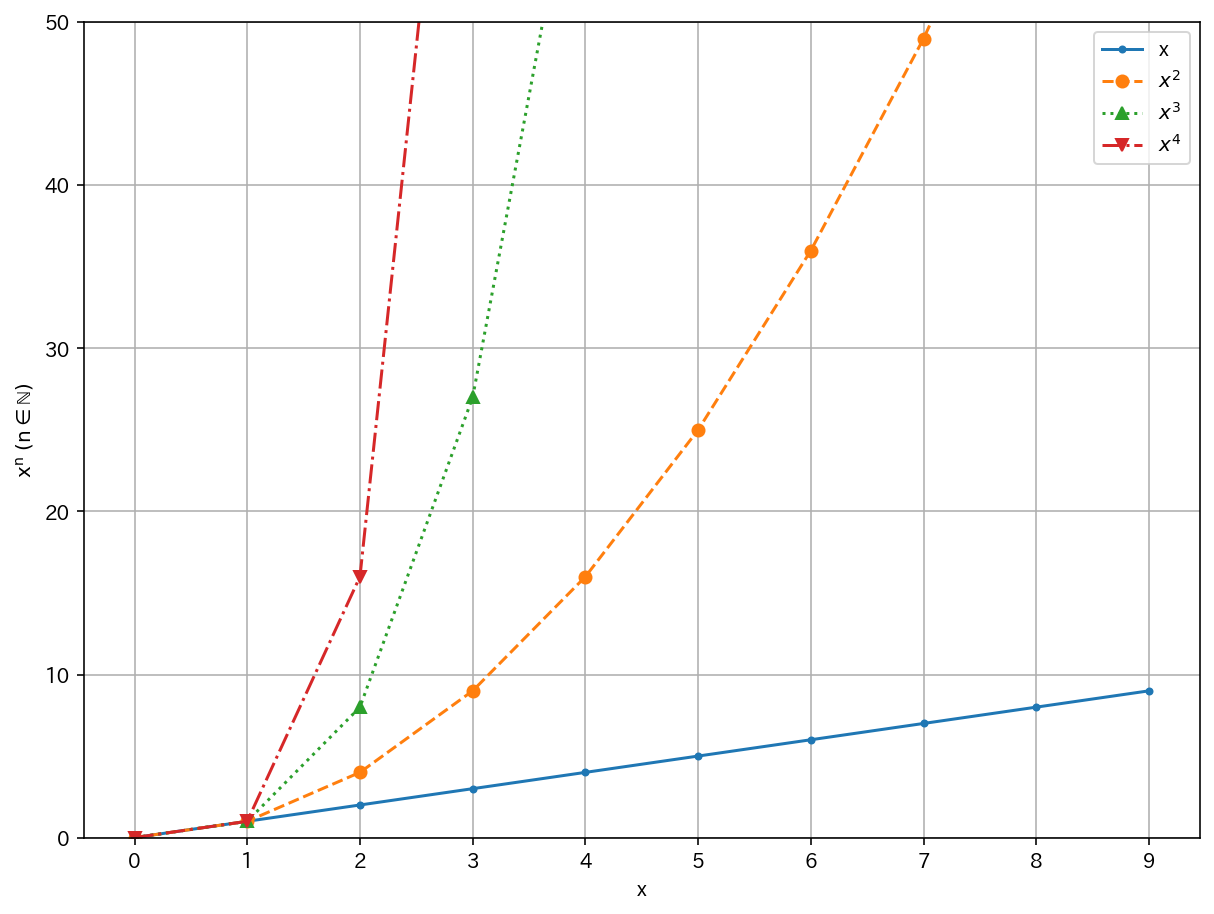

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7.5))

# linestyle で点線などを指定。
# marker で plot した点の種類を決定。(markerを設定しなければmarkerは出てこない)
x = np.arange(10)
ax.plot(x, linestyle="-", marker=".", label="x")
ax.plot(x**2, linestyle="--", marker="o", label="$x^2$") # 文字列を $ で挟むと tex 形式になる。
ax.plot(x**3, linestyle=":", marker="^", label="$x^3$")
ax.plot(x**4, linestyle="-.", marker="v", label="$x^4$")
# xticks は x軸の目盛。ylim は y軸の描画範囲。xlabel は x軸の title。ylabel は y軸の title。
# こういうふうに一括で設定することもできる。
ax.set(xticks=x, ylim=[0, 50], xlabel="x", ylabel="$\mathrm{x^n~(n\in\mathbb{N})}$")
# grid 線の描画。
ax.grid()
# 凡例を表示。
ax.legend()
# 図の全体を見せる。
plt.show()

片対数グラフ

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


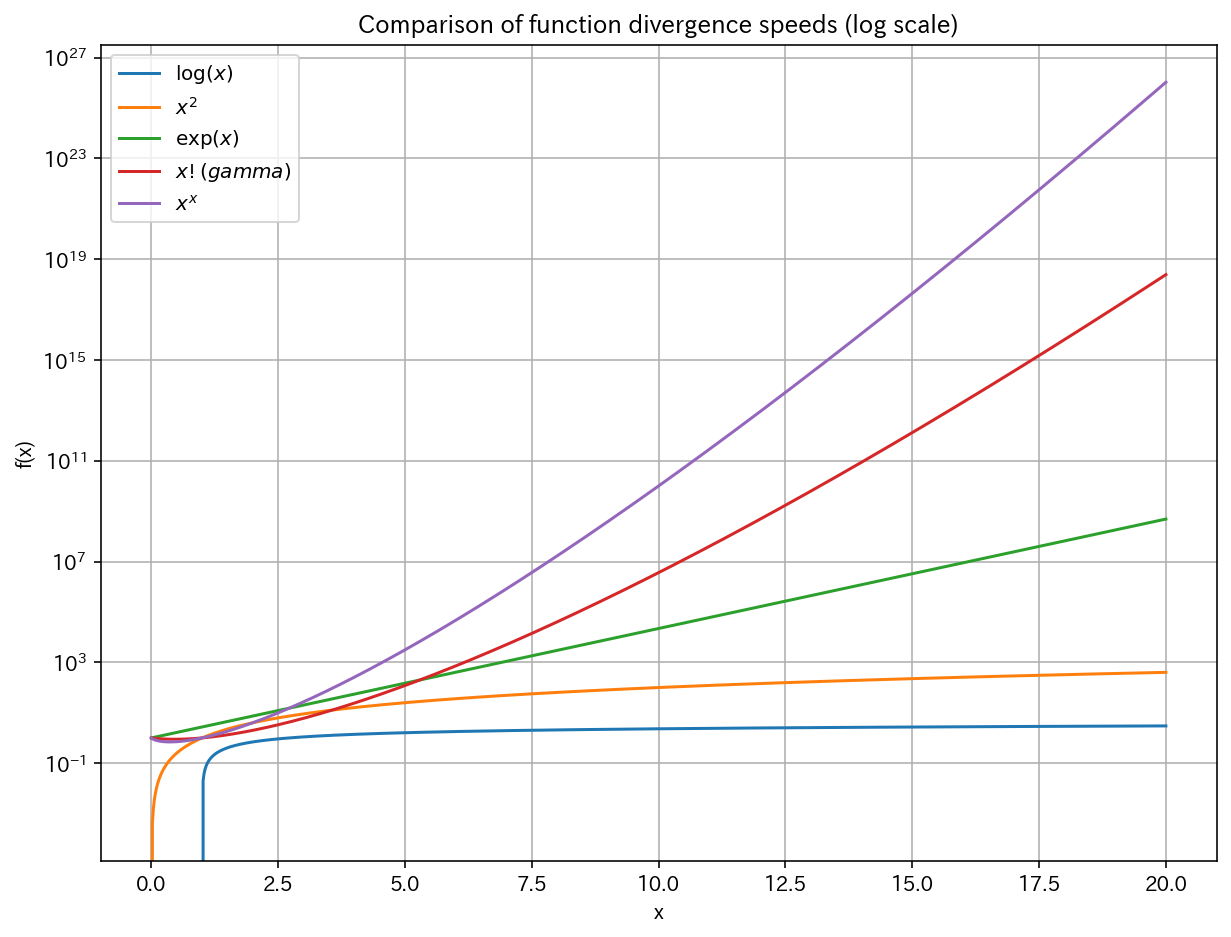

In [ ]:
# log scale
fig, ax = plt.subplots(figsize=(10,7.5))

x = np.linspace(0, 20, 1001)
# xx = np.arange(20)

from scipy.special import gamma
dict_functions = {
    '$\log(x)$' : lambda x : np.log(x),
    '$x^{2}$' : lambda x : x**2,
    '$\exp(x)$' : lambda x : np.exp(x),
    '$x!(gamma)$' : lambda x : gamma(x+1),
    # '$x!$' : lambda x : np.math.factorial(x),
    '$x^{x}$' : lambda x : x**x,
}

for label, function in dict_functions.items():
  # if label=='$x!$':
  #   # ax.plot(xx, function(xx), label=label)
  #   ax.plot(xx, [function(x) for x in xx], label=label, marker='o')
  # else:
  ax.plot(x, function(x), label=label)

ax.set_yscale("log") # y axis の scale を log にする。
ax.set_title("Comparison of function divergence speeds")
ax.set(
  title = "Comparison of function divergence speeds (log scale)",
  xlabel = 'x',
  ylabel = 'f(x)',
  yscale = "log", # こう書いてもOK
)
ax.legend()
ax.grid()
plt.show()

## `plot.scatter()` (散布図)

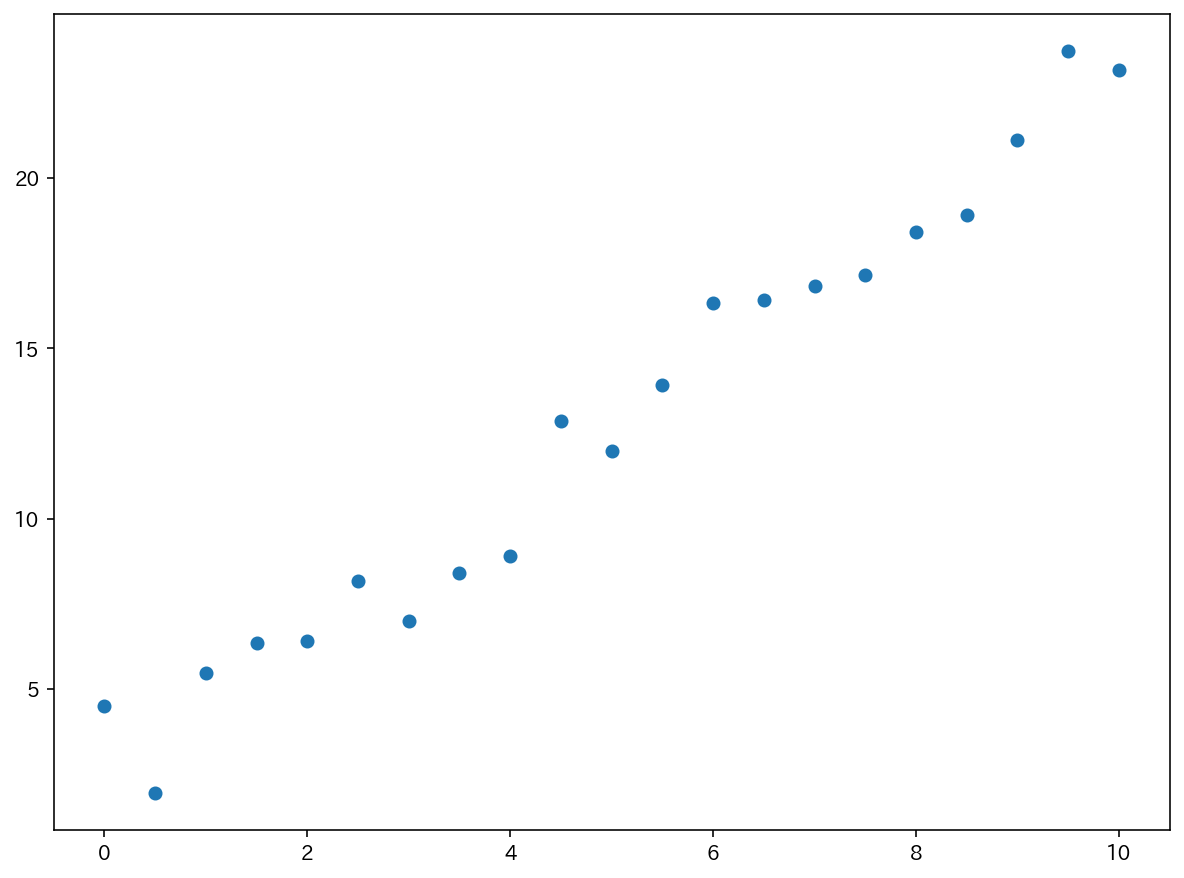

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7.5))

x = np.linspace(0, 10, 21)
y = 2.0 * x + 3.0 + np.random.randn(21)

ax.scatter(x, y)

plt.show()

## `plt.errorbar` (誤差付きグラフ)

In [ ]:
curve_fit?

[3.74449869 2.00387682]
[0.20641167 0.07835387]


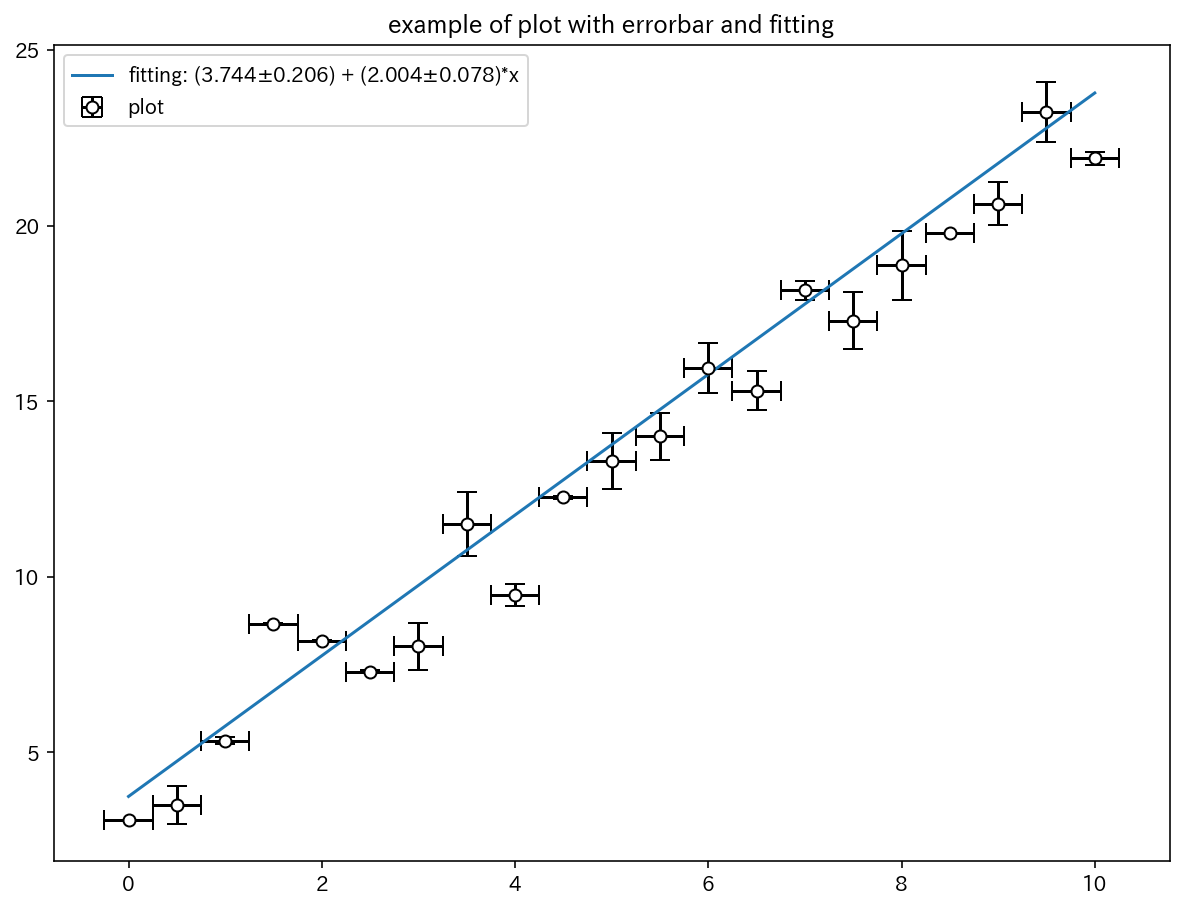

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7.5))

x = np.linspace(0, 10, 21)
y = 2.0 * x + 3.0 + np.random.randn(21)
yerr = np.random.rand(21)
xerr = np.full(21, 0.25)

ax.errorbar(
  x, y,
  yerr = yerr,
  xerr = xerr,
  capsize=5,
  fmt='o',
  markersize=6,
  ecolor='black',
  markeredgecolor = "black",
  color='w',
  label = 'plot'
)

# 誤差付きフィッティング
# x軸の誤差は考慮できないみたい
from scipy.optimize import curve_fit

def fit_func(x, p0, p1):
  return p0 + p1*x

par, pcov = curve_fit(fit_func, x, y, sigma=yerr)
perr = np.sqrt(np.diag(pcov))
print(par)
print(perr)

ax.plot(x, fit_func(x, par[0], par[1]), label=f'fitting: ({par[0]:.3f}$\pm${perr[0]:.3f}) + ({par[1]:.3f}$\pm${perr[1]:.3f})*x')
ax.set_title('example of plot with errorbar and fitting')
ax.legend()
plt.show()

HE研の先輩のチュートリアルから引っ張ってきたHiggs粒子のシグナルっぽいやつ

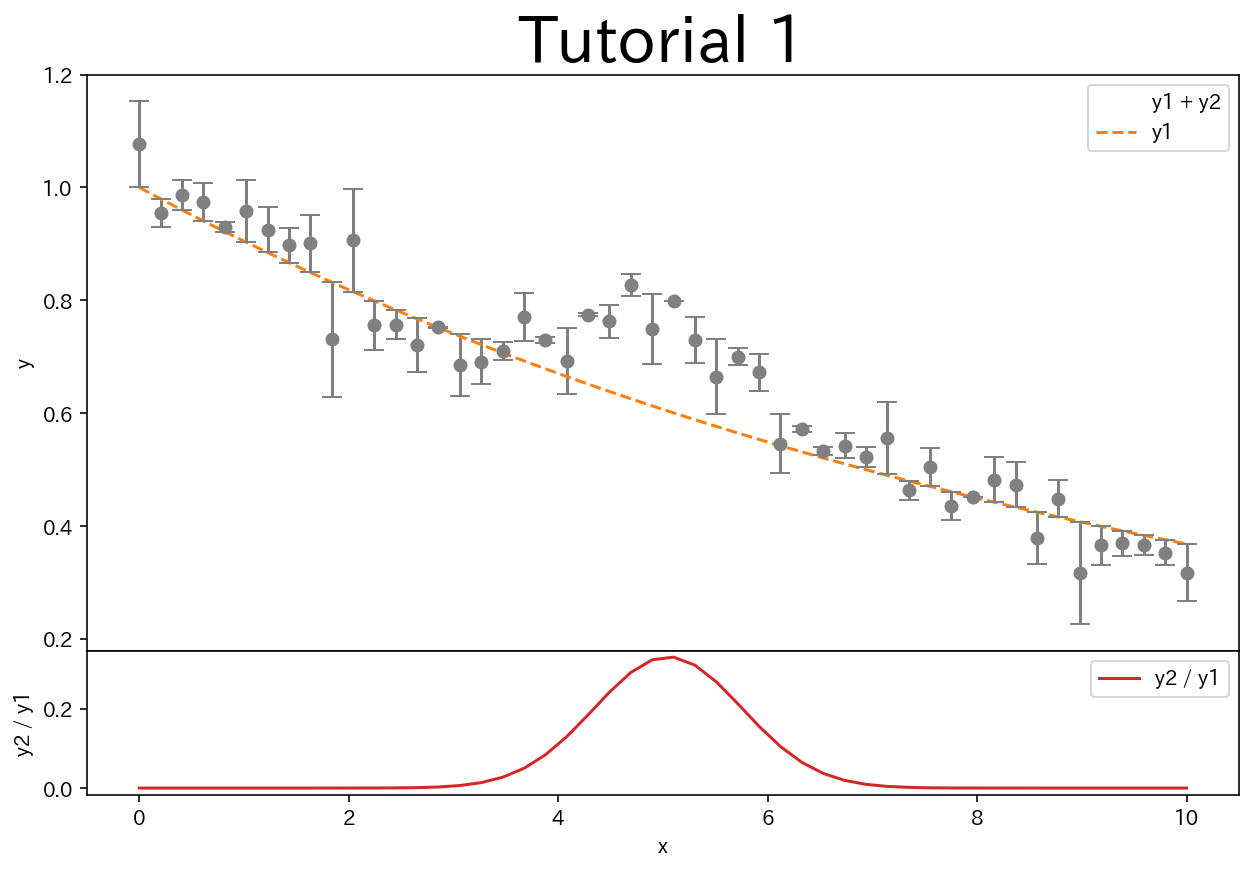

In [ ]:
# add_axes で　ax を追加する。

# データの用意。
x = np.linspace(0, 10, 50)
y1 = np.exp(-x/10)
y2 = np.exp(-(x-5)**2)/5
e = np.random.randn(50)/30

left = 0.1 # figure の左端からの距離。
bottom = 0.3 # figure の底からの距離。
width = 0.8 # 新しい ax の幅。
height = 0.8 # 新しい ax の高さ。
height_mini_fig = 0.2 # 新しい ax の高さ。

# figure を用意。
fig = plt.figure(figsize=(10, 5))

# ax1 を追加する。
ax1 = fig.add_axes((left, bottom, width, height))
ax1.plot(x, y1+y2, label="y1 + y2", linestyle="", marker="")
ax1.plot(x, y1, label="y1", linestyle="--", marker="")
ax1.errorbar(x, y1+y2+e, yerr=e, fmt="o", color="gray", capsize=5)
ax1.set_ylabel("y")
ax1.set_title("Tutorial 1", fontsize=32)
ax1.legend()
# ax1 の横軸の目盛とラベルを消す。
ax1.tick_params(bottom=False, labelbottom=False)

# ax1 の下に ax2 を追加する。sharex=ax1 で横軸を ax1 と共有する。
ax2 = fig.add_axes([left, bottom-height_mini_fig, width, height_mini_fig], sharex=ax1)
ax2.plot(x, y2/y1, color="tab:red", label="y2 / y1")
ax2.set_xlabel("x")
ax2.set_ylabel("y2 / y1")
ax2.legend()
plt.show()

## `plot.hist()` (ヒストグラム)

[ 0.38566586 -0.82936341  0.11009698  0.79645054 -0.0475327   0.86697017
 -1.20961118 -0.46661338 -0.09185248 -0.64534032]


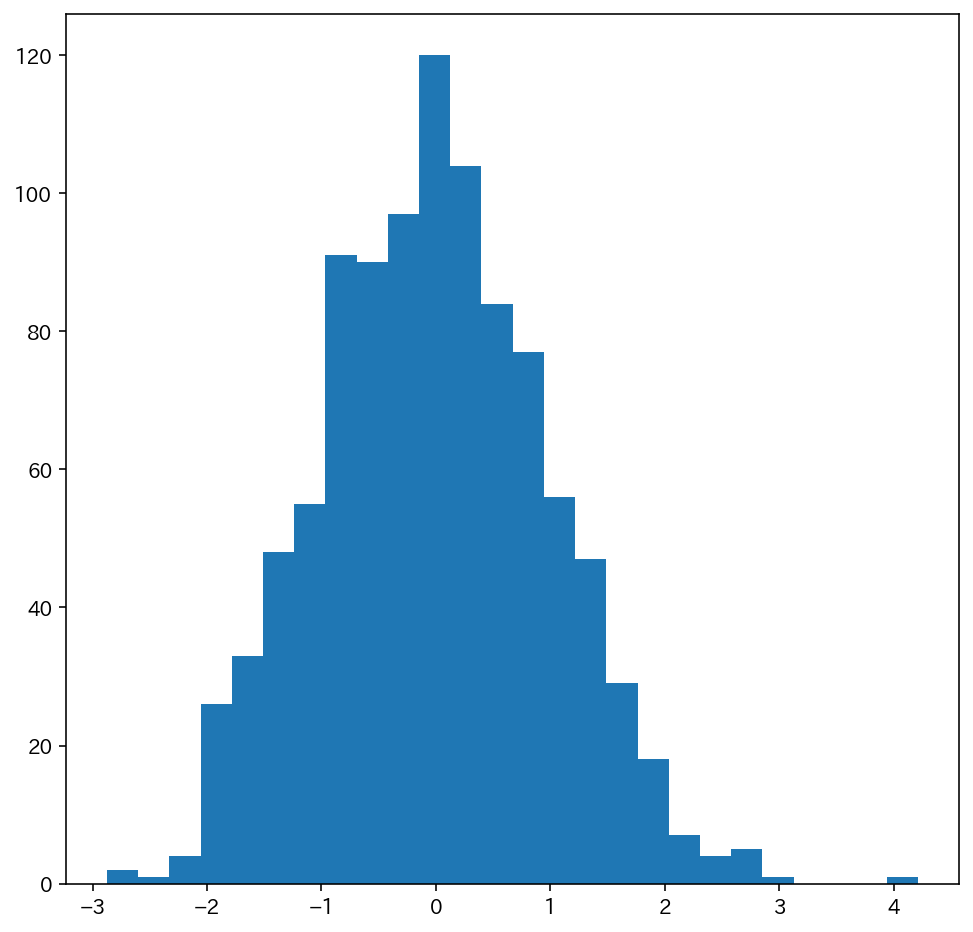

In [ ]:
# データの用意。
x = np.random.randn(1000) # 平均 0, 標準偏差 1 の正規分布。
y = 1 / np.sqrt(2 * np.pi) * np.exp(-0.5 * x**2) # 平均 0, 標準偏差 1 の確率密度関数。
print(x[:10])

# 通常の histgram
fig, ax = plt.subplots(figsize=(8, 8))
ax.hist(x, bins="auto")
plt.show()

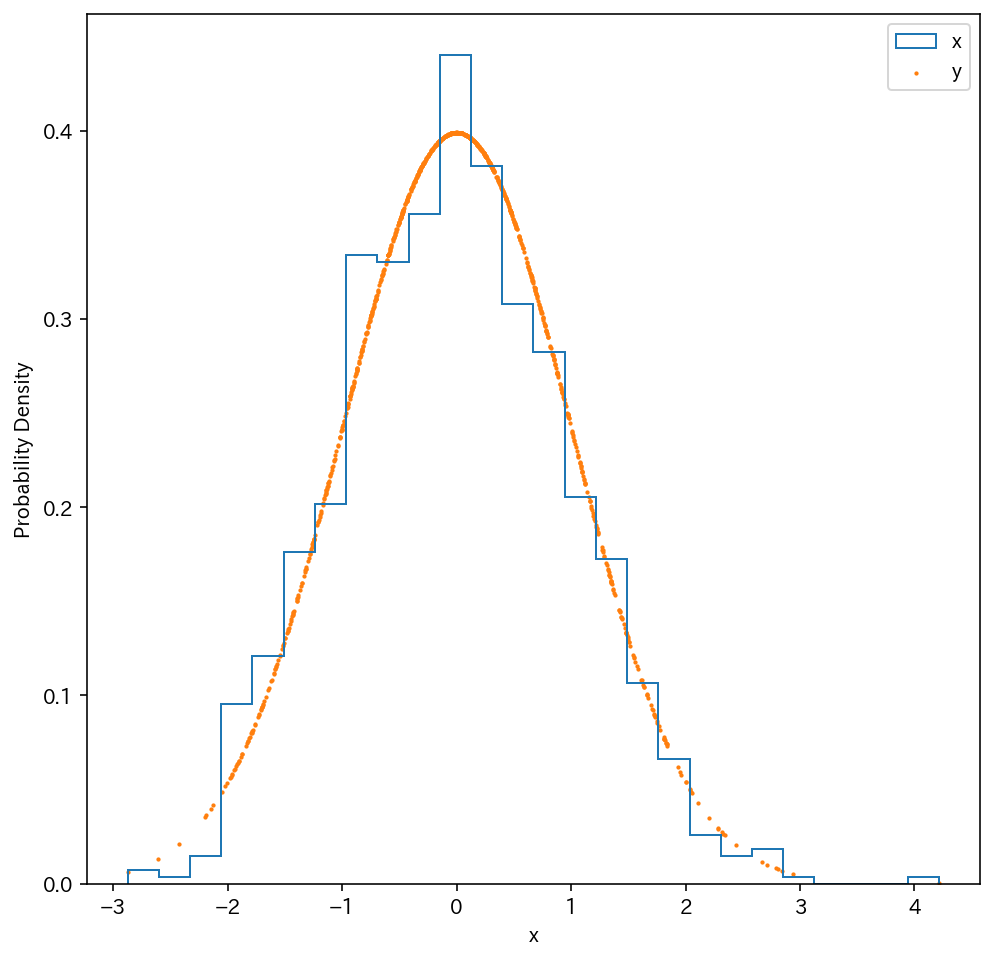

1.0


In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
count, bins, _ = ax.hist(x, bins="auto", histtype="step", # histtype を step にする。
                         density=True, label="x") # density = True で確率密度になる。
ax.scatter(x, y, s=5.0, marker=".", label="y") # scatter は散布図を作成する。s は marker の大きさ。
ax.set(xlabel="x", ylabel="Probability Density")
ax.legend()
plt.show()

# 面積が 1 になるか確認。
print(sum(count * np.diff(bins)))

### binsの設定について

binsの設定は二通りの方法がある。

方法1: int値のみを与える方法。この場合、与えられたデータの最小値から最大値までを与えられたint値で分割してヒストグラムを行う。簡便だが、2つの弱点がある。


1.   極端な外れ値があるデータの場合、よくわからないことになる。
2.   複数のヒストグラムを同一axes上に載せる場合、binの区切りがおかしくなる。


データをとりあえず確認したい場合はこちらの方法1でいいと思う。



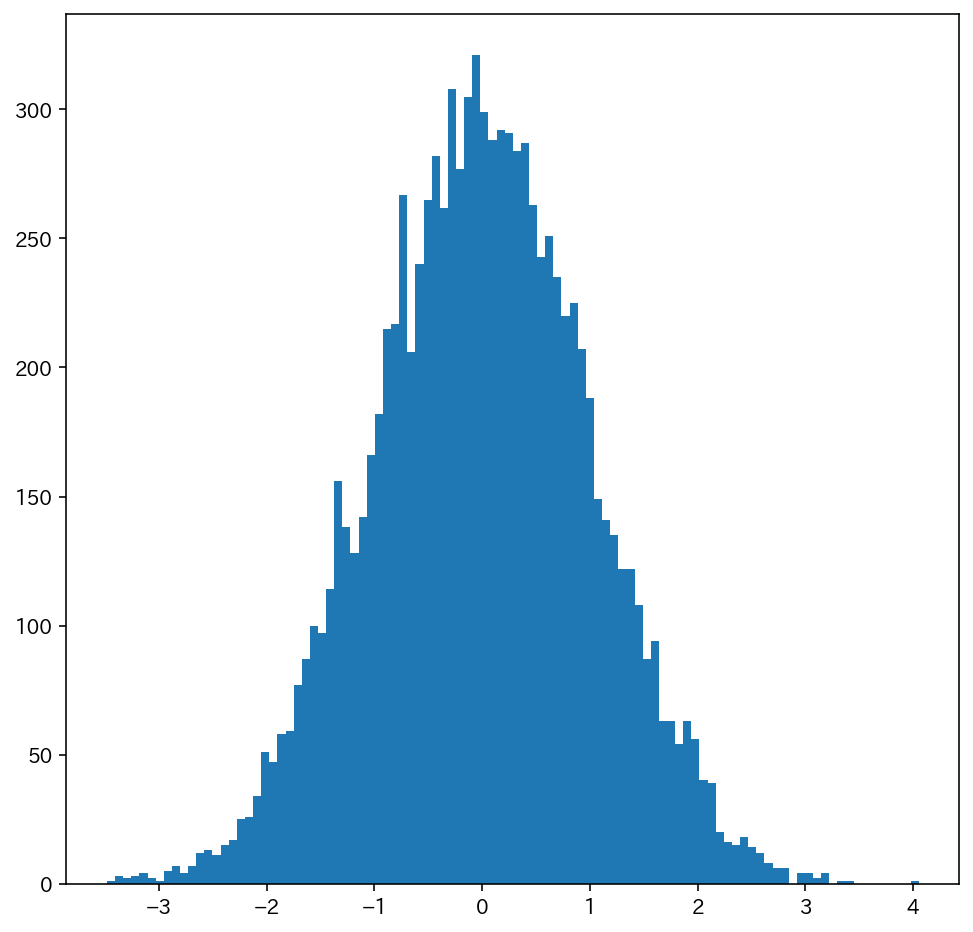

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.hist(np.random.randn(10000), bins =100)
plt.show()

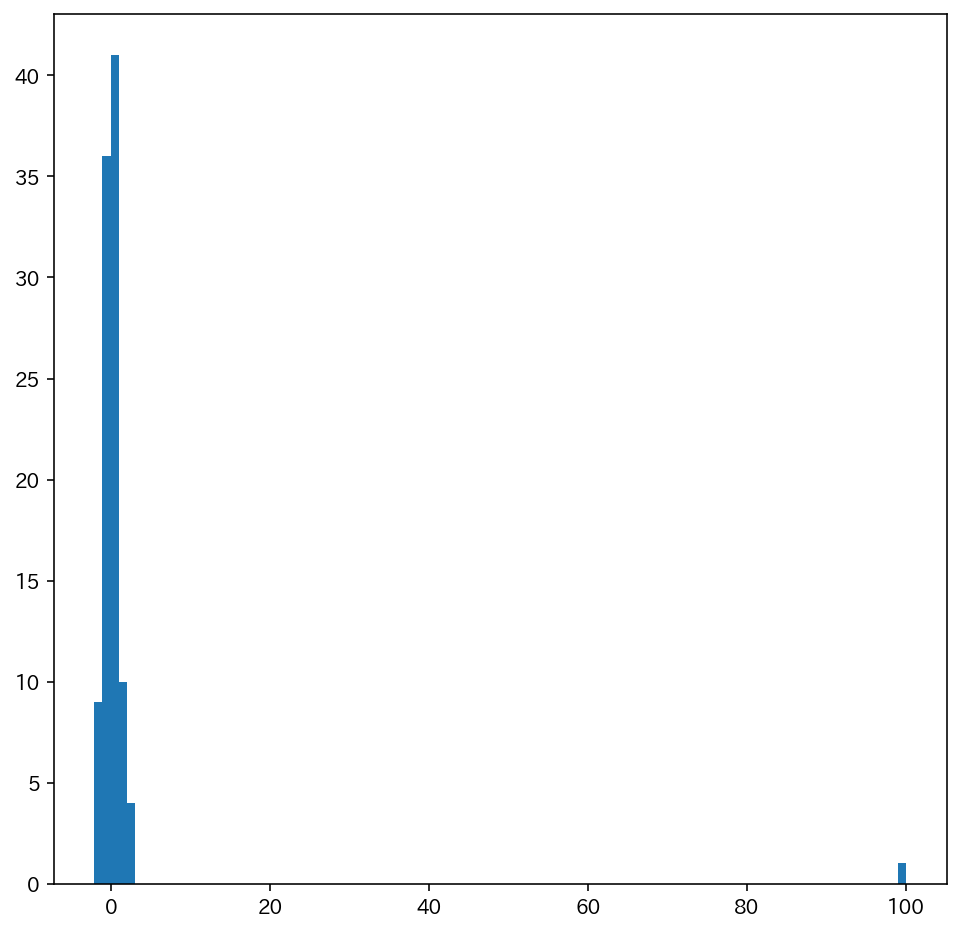

In [ ]:
# 弱点1の例
fig, ax = plt.subplots(figsize=(8, 8))

ax.hist(np.concatenate([np.random.randn(100), np.array([100.])]), bins=100)
plt.show()

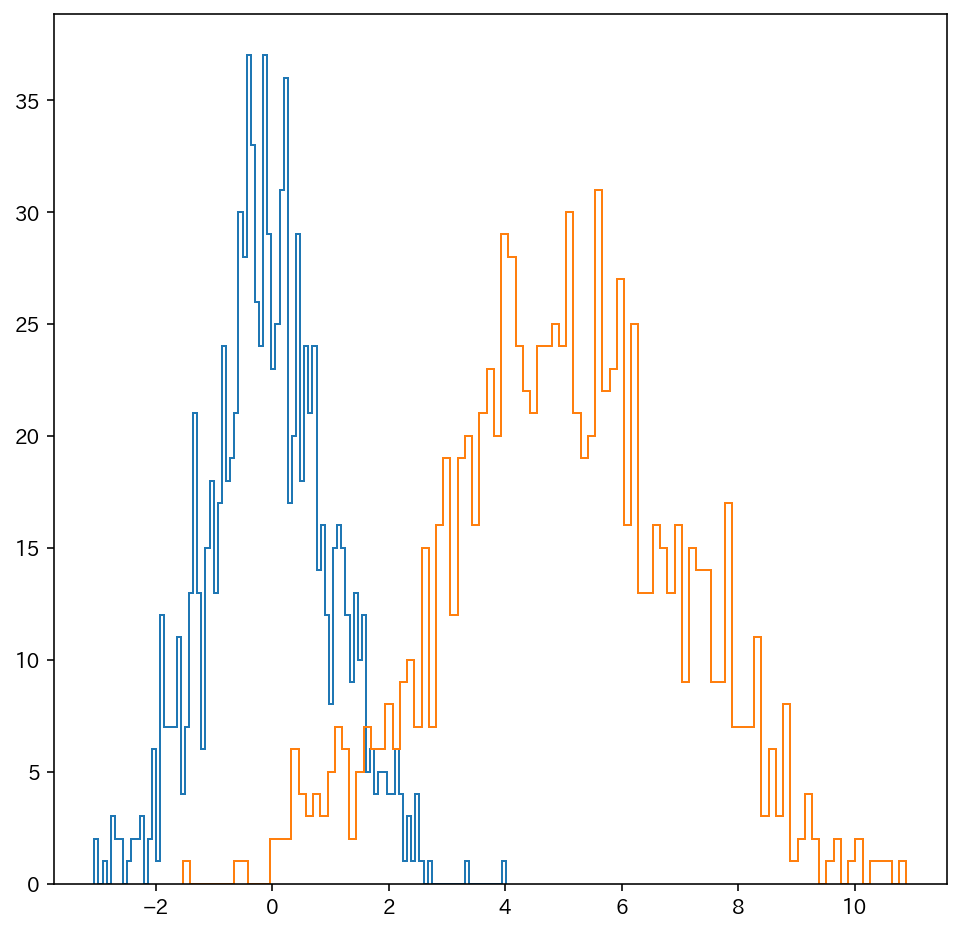

In [ ]:
# 弱点2の例
fig, ax = plt.subplots(figsize=(8, 8))

ax.hist(np.random.randn(1000), bins=100, histtype='step')
ax.hist(np.random.normal(5, 2, 1000), bins=100, histtype='step')
plt.show()

方法2: binsに`np.linspace()`を渡してあげる。こうすると、最小値、最大値、ビン数を手動で設定できる

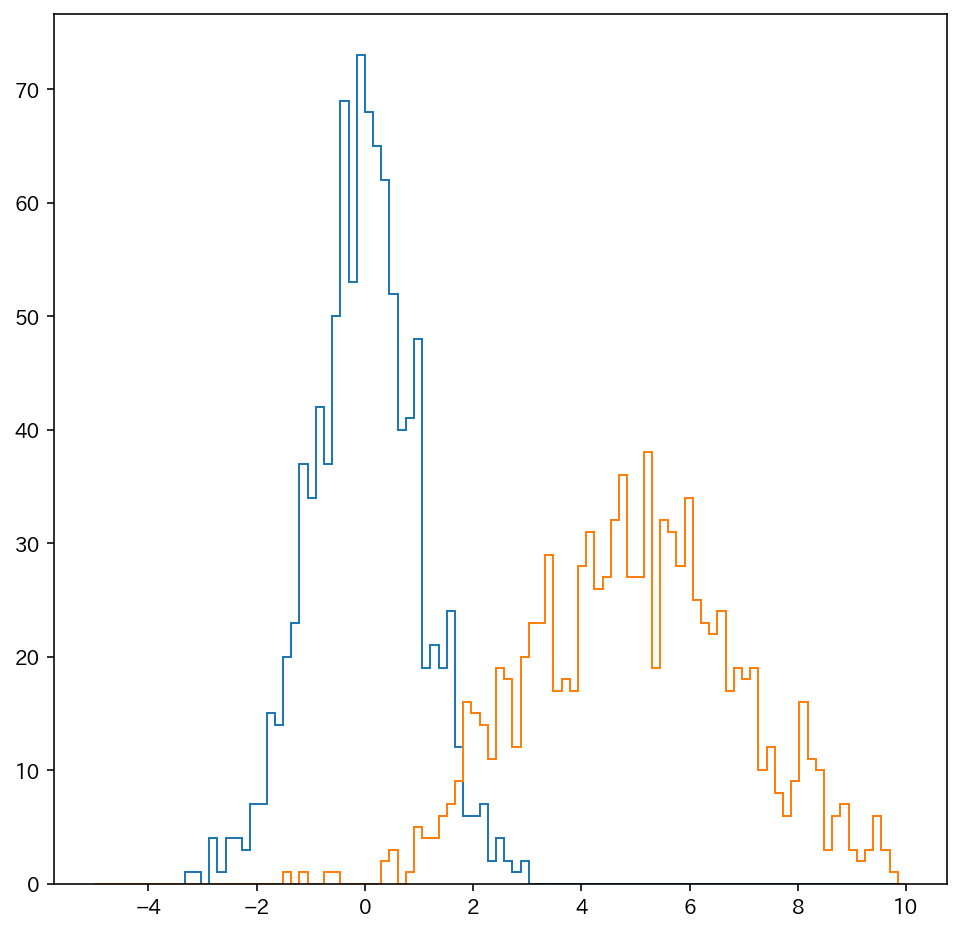

In [ ]:
# 方法1の弱点2の改善例
fig, ax = plt.subplots(figsize=(8, 8))

bins = np.linspace(-5, 10, 100)

ax.hist(np.random.randn(1000), bins=bins, histtype='step')
ax.hist(np.random.normal(5, 2, 1000), bins=bins, histtype='step')
plt.show()

練習問題 : コメントの指示に従って中心極限定理を確かめよ。

中心極限定理：

平均が$\mu$、分散が$\sigma^{2}$の任意の母集団からサンプルサイズ$N>>1$の標本を抽出し、標本平均を求める行程を繰り返したとき、$N$が大きくなるにつれて、標本平均の分布は平均$\mu$、分散$\sigma^{2} / N$の正規分布$N(\mu, \sigma / \sqrt{N})$に近づく。

In [ ]:
np.random.choice?

mu = 49.98	sigma = 28.89
一様分布の標準偏差を計算：28.87


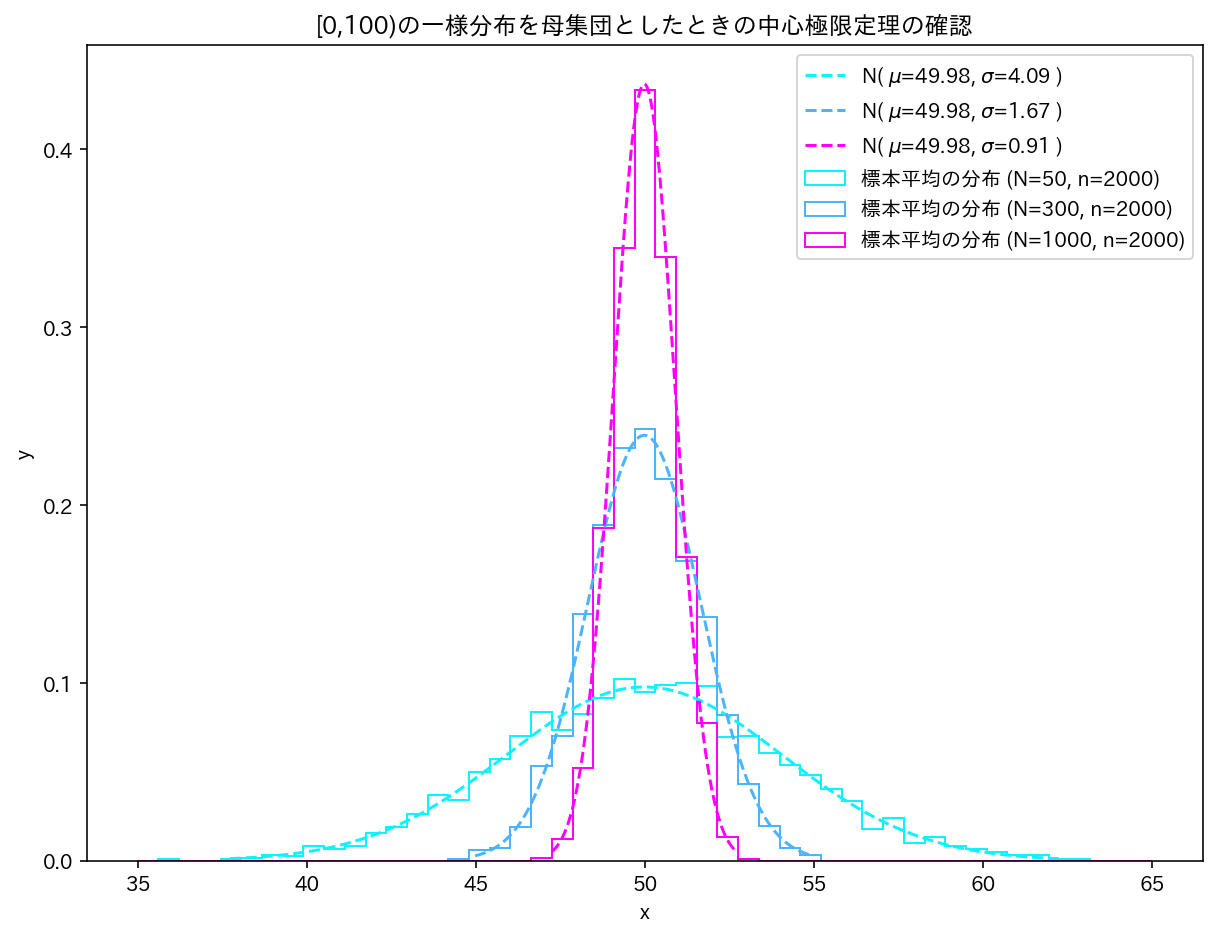

In [16]:
from scipy.stats import norm # 正規分布の式
import matplotlib.cm as cm # カラーマップの設定

X = np.random.rand(1000000)*100 # 母集団として0〜100の一様分布の乱数を10000個生成
mu = np.mean(X) # 母平均
sigma = np.std(X) # 母標準偏差

print(f"mu = {mu:.2f}\tsigma = {sigma:.2f}")
print(f"一様分布の標準偏差を計算：{np.sqrt((100-0)**2 /12):.2f}")

# サイズ1000の標本の平均を算出する試行を2000回行う
N = 1000 # 標本サイズ
Ns = [50, 300, 1000]
n = 2000 # 試行回数

# 標本を抽出し, サイズがn(=2000)で、各要素がそれぞれサイズがN(=1000)の標本の平均であるリストを作成する
# 標本抽出にはnp.random.choice()を使う。使い方はググろう

# print(sample_means.shape)

"""
sample_means = np.empty(n, dtype=np.float64)

for i in range(n):
  sample_means[i] = np.mean(np.random.choise(X, N))
"""


#### 図の作成(体裁をいい感じに整えよう) ####
fig, ax = plt.subplots(figsize=(10, 7.5))

# sample_meansのヒストグラムを作成
for i, N in enumerate(Ns):
  sample_means = []

  for j in range(n):
    sample_means.append(np.mean(np.random.choice(X, N)))

  sample_means = np.array(sample_means)



  ax.hist(
      sample_means,
      bins=np.linspace(35, 65, 50),
      histtype='step',
      label = f'標本平均の分布 (N={N}, n={n})',
      density=True,
      color = cm.cool(N/np.max(Ns)),
  )

  #平均mu、標準偏差sigma/√Nの正規分布グラフを作成
  x = np.linspace(-3*sigma/np.sqrt(N) + mu, 3*sigma/np.sqrt(N) + mu, 1000)

  ax.plot(
      x, norm.pdf(x, loc=mu, scale=sigma/np.sqrt(N)),
      label=f'N( $\mu$={mu:.2f}, $\sigma$={(sigma/np.sqrt(N)):.2f} )',
      color = cm.cool(N/np.max(Ns)),
      linestyle='--',
      )


ax.set(
    xlabel='x',
    ylabel='y',
    title='[0,100)の一様分布を母集団としたときの中心極限定理の確認',
)

ax.legend()
plt.show()

In [ ]:
cm = plt.cm.get_cmap('hsv')

cm(0.1)

(1.0, 0.5790446966917554, 0.0, 1.0)

In [ ]:
np.random.choice(np.arange(10), 3)

array([0, 3, 4])

## 2次元ヒストグラム

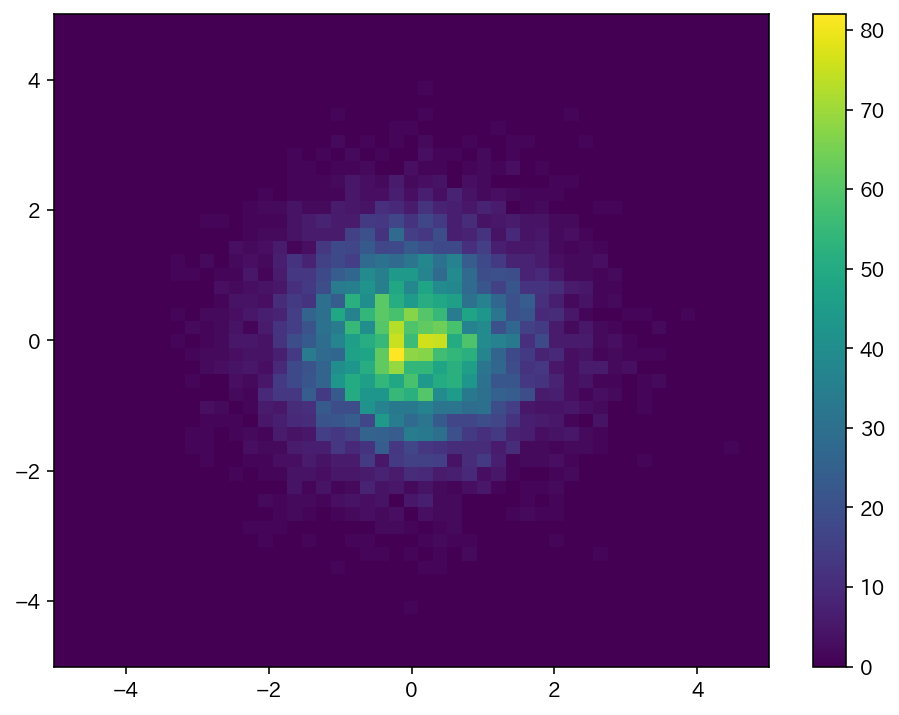

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

x = np.random.randn(10000)
y = np.random.randn(10000)

H = ax.hist2d(
    x, y,
    # bins=50,
    # bins = (50, 30),
    bins = np.linspace(-5, 5, 50),
    # bins = (np.linspace(-5, 5, 50), np.linspace(-3, 3, 30)) ,
    )
fig.colorbar(H[3],ax=ax)
plt.show()

## 3次元グラフ